In [5]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [6]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df_label = dataframe['Outcome']
df_features = dataframe.drop('Outcome', 1)
df_features.replace('?', -99999, inplace=True)
print(df_label.head())
df_features.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

In [9]:
data = np.array(df_features)
label = np.array(label)
print(data.shape,label.shape)

(768, 8) (768, 2)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
x_train.shape

(614, 8)

# SVM

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import time
start = time.time()


In [12]:
dataset  = pd.read_csv("diabetes.csv")
dataset.head()
features = dataset.columns

In [13]:
train, test = train_test_split(dataset, test_size = 0.35,random_state=30)
x_train = train[features]
y_train = train["Outcome"]
x_test = test[features]
y_test = test["Outcome"]


svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
score = accuracy*100 
print("Accuracy using SVM: ",round(score, 1), "%" )
end = time.time()
print(end - start)

Accuracy using SVM:  66.9 %
1.3749032020568848


# Decision Tree

In [69]:
import time
start = time.time()
import pandas as pd
import numpy as mp

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import io
from scipy import misc

In [70]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
features = dataframe.columns
#features
features = ['Pregnancies','SkinThickness','Glucose','Insulin','BloodPressure','BMI','DiabetesPedigreeFunction','Age']
len(features)

8

In [72]:
#features
train, test = train_test_split(data, test_size = 0.35,random_state=30)
print(len(train))
print(len(test))
c= DecisionTreeClassifier(min_samples_split = 100)
x_train = train[features]
y_train = train["Outcome"]

x_test = test[features]
y_test = test["Outcome"]
dt = c.fit(x_train, y_train)


499
269


C:\Users\prota\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Accuracy using desicion Tree:  75.8 %


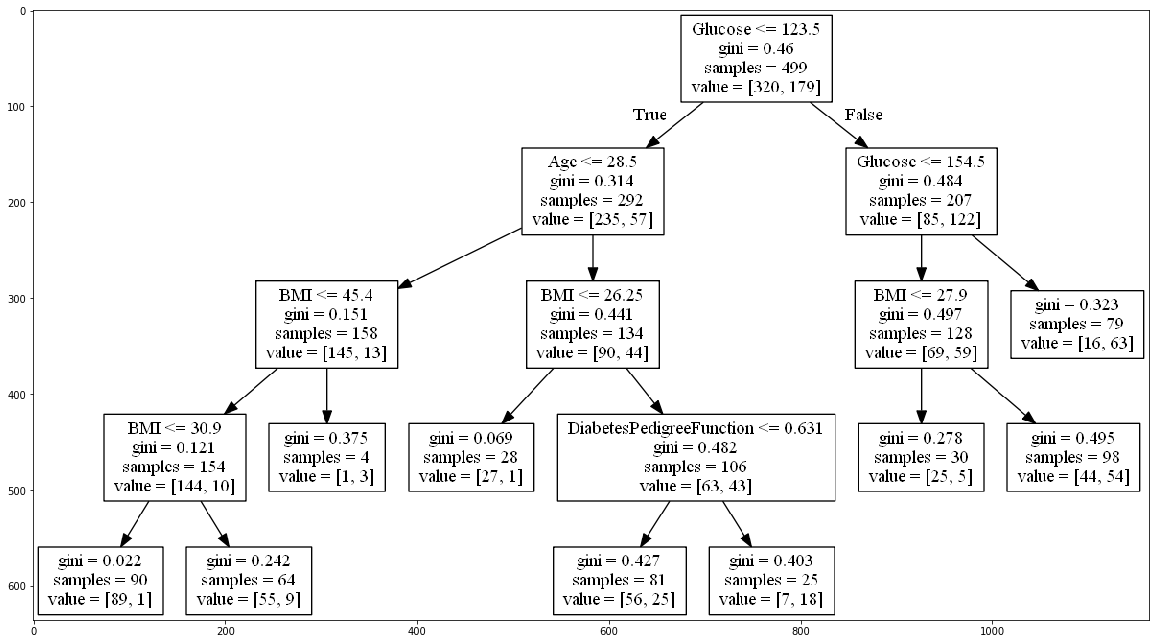

In [73]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names= features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)
    
show_tree(dt, features, 'tree.jpg')
show_tree(dt, features, 'tree.pdf')
y_pred = c.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

# Naive Bayes

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import time
start = time.time()

In [15]:
xl=pd.read_csv('diabetes.csv')
x=xl.iloc[:,0:7].values
y=xl.iloc[:,8].values
#data.head()

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35,random_state=30)
logreg = GaussianNB()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print("Test Accuracy: ",accuracy*100)
end = time.time()
print(end - start)

Test Accuracy:  77.32342007434944
1.2436318397521973


# Logistic Regression

In [17]:
dataset  = pd.read_csv("diabetes.csv")
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)
import time
start = time.time()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set,train_set_labels, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78  8]
 [12 25]]


In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )
end = time.time()
print(end - start)

Accuracy using desicion Tree:  83.7 %
4.249032258987427


# Logistic Regression Impulse

In [44]:
dataset  = pd.read_csv("diabetes.csv")
median_bmi = dataset['BMI'].std()
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = dataset['BloodPressure'].std()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

median_plglcconc = dataset['Glucose'].std()
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

median_skinthick = dataset['SkinThickness'].std()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

median_Insulin = dataset['Insulin'].std()
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_Insulin)

median_DiabetesPedigreeFunction = dataset['DiabetesPedigreeFunction'].std()
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(
    to_replace=0, value=median_DiabetesPedigreeFunction)

median_Age = dataset['Age'].std()
dataset['Age'] = dataset['Age'].replace(
    to_replace=0, value=median_Age)

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set,train_set_labels, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

C:\Users\prota\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  79.7 %
